In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving health_facility_locations.csv to health_facility_locations.csv


In [ ]:
health_facility = pd.read_csv('health_facility_locations.csv', encoding='ISO-8859-1')


In [ ]:
health_facility.head()

,LICENSED_CERTIFIED,FLAG,T18_19,FACID,FAC_STATUS_TYPE_CODE,ASPEN_FACID,CCN,TERMINAT_SW,PARTICIPATION_DATE,APPROVAL_DATE,...,HCAI_ID,CCLHO_CODE,CCLHO_NAME,FIPS_COUNTY_CODE,BIRTHING_FACILITY_FLAG,TRAUMA_PED_CTR,TRAUMA_CTR,TYPE_OF_CARE,CRITICAL_ACCESS_HOSPITAL,DATA_DATE
0,LICENSED AND CERTIFIED,NaN,T18 OR T18/19,10000001,OPEN,CA010000001,555120,NaN,11/07/1980,01/02/2025,...,206492251.0,49,SONOMA,6097,NaN,NaN,NaN,NaN,NaN,03/17/2025
1,LICENSED AND CERTIFIED,NaN,T18 OR T18/19,10000003,OPEN,CA010000003,056090,NaN,02/01/1974,05/29/2024,...,206490940.0,49,SONOMA,6097,NaN,NaN,NaN,NaN,NaN,03/17/2025
2,LICENSED AND CERTIFIED,NaN,T18 OR T18/19,10000004,OPEN,CA010000004,056296,NaN,09/14/1971,08/27/2024,...,206080930.0,8,DEL NORTE,6015,NaN,NaN,NaN,NaN,NaN,03/17/2025
3,LICENSED AND CERTIFIED,NaN,T18 OR T18/19,10000005,OPEN,CA010000005,555703,NaN,04/18/1997,10/28/2024,...,206490931.0,49,SONOMA,6097,NaN,NaN,NaN,NaN,NaN,03/17/2025
4,LICENSED AND CERTIFIED,NaN,T18 OR T18/19,10000024,OPEN,CA010000024,056300,NaN,07/10/1973,09/23/2024,...,206120955.0,12,HUMBOLDT,6023,NaN,NaN,NaN,NaN,NaN,03/17/2025


In [ ]:
health_facility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15856 entries, 0 to 15855
Data columns (total 59 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   LICENSED_CERTIFIED              15856 non-null  object 
 1   FLAG                            1009 non-null   object 
 2   T18_19                          2178 non-null   object 
 3   FACID                           15856 non-null  int64  
 4   FAC_STATUS_TYPE_CODE            15856 non-null  object 
 5   ASPEN_FACID                     14022 non-null  object 
 6   CCN                             9621 non-null   object 
 7   TERMINAT_SW                     218 non-null    object 
 8   PARTICIPATION_DATE              9568 non-null   object 
 9   APPROVAL_DATE                   9004 non-null   object 
 10  NPI                             8188 non-null   float64
 11  CAN_BE_DEEMED_FAC_TYPE          12742 non-null  object 
 12  CAN_BE_CERTIFIED_FAC_TYPE       

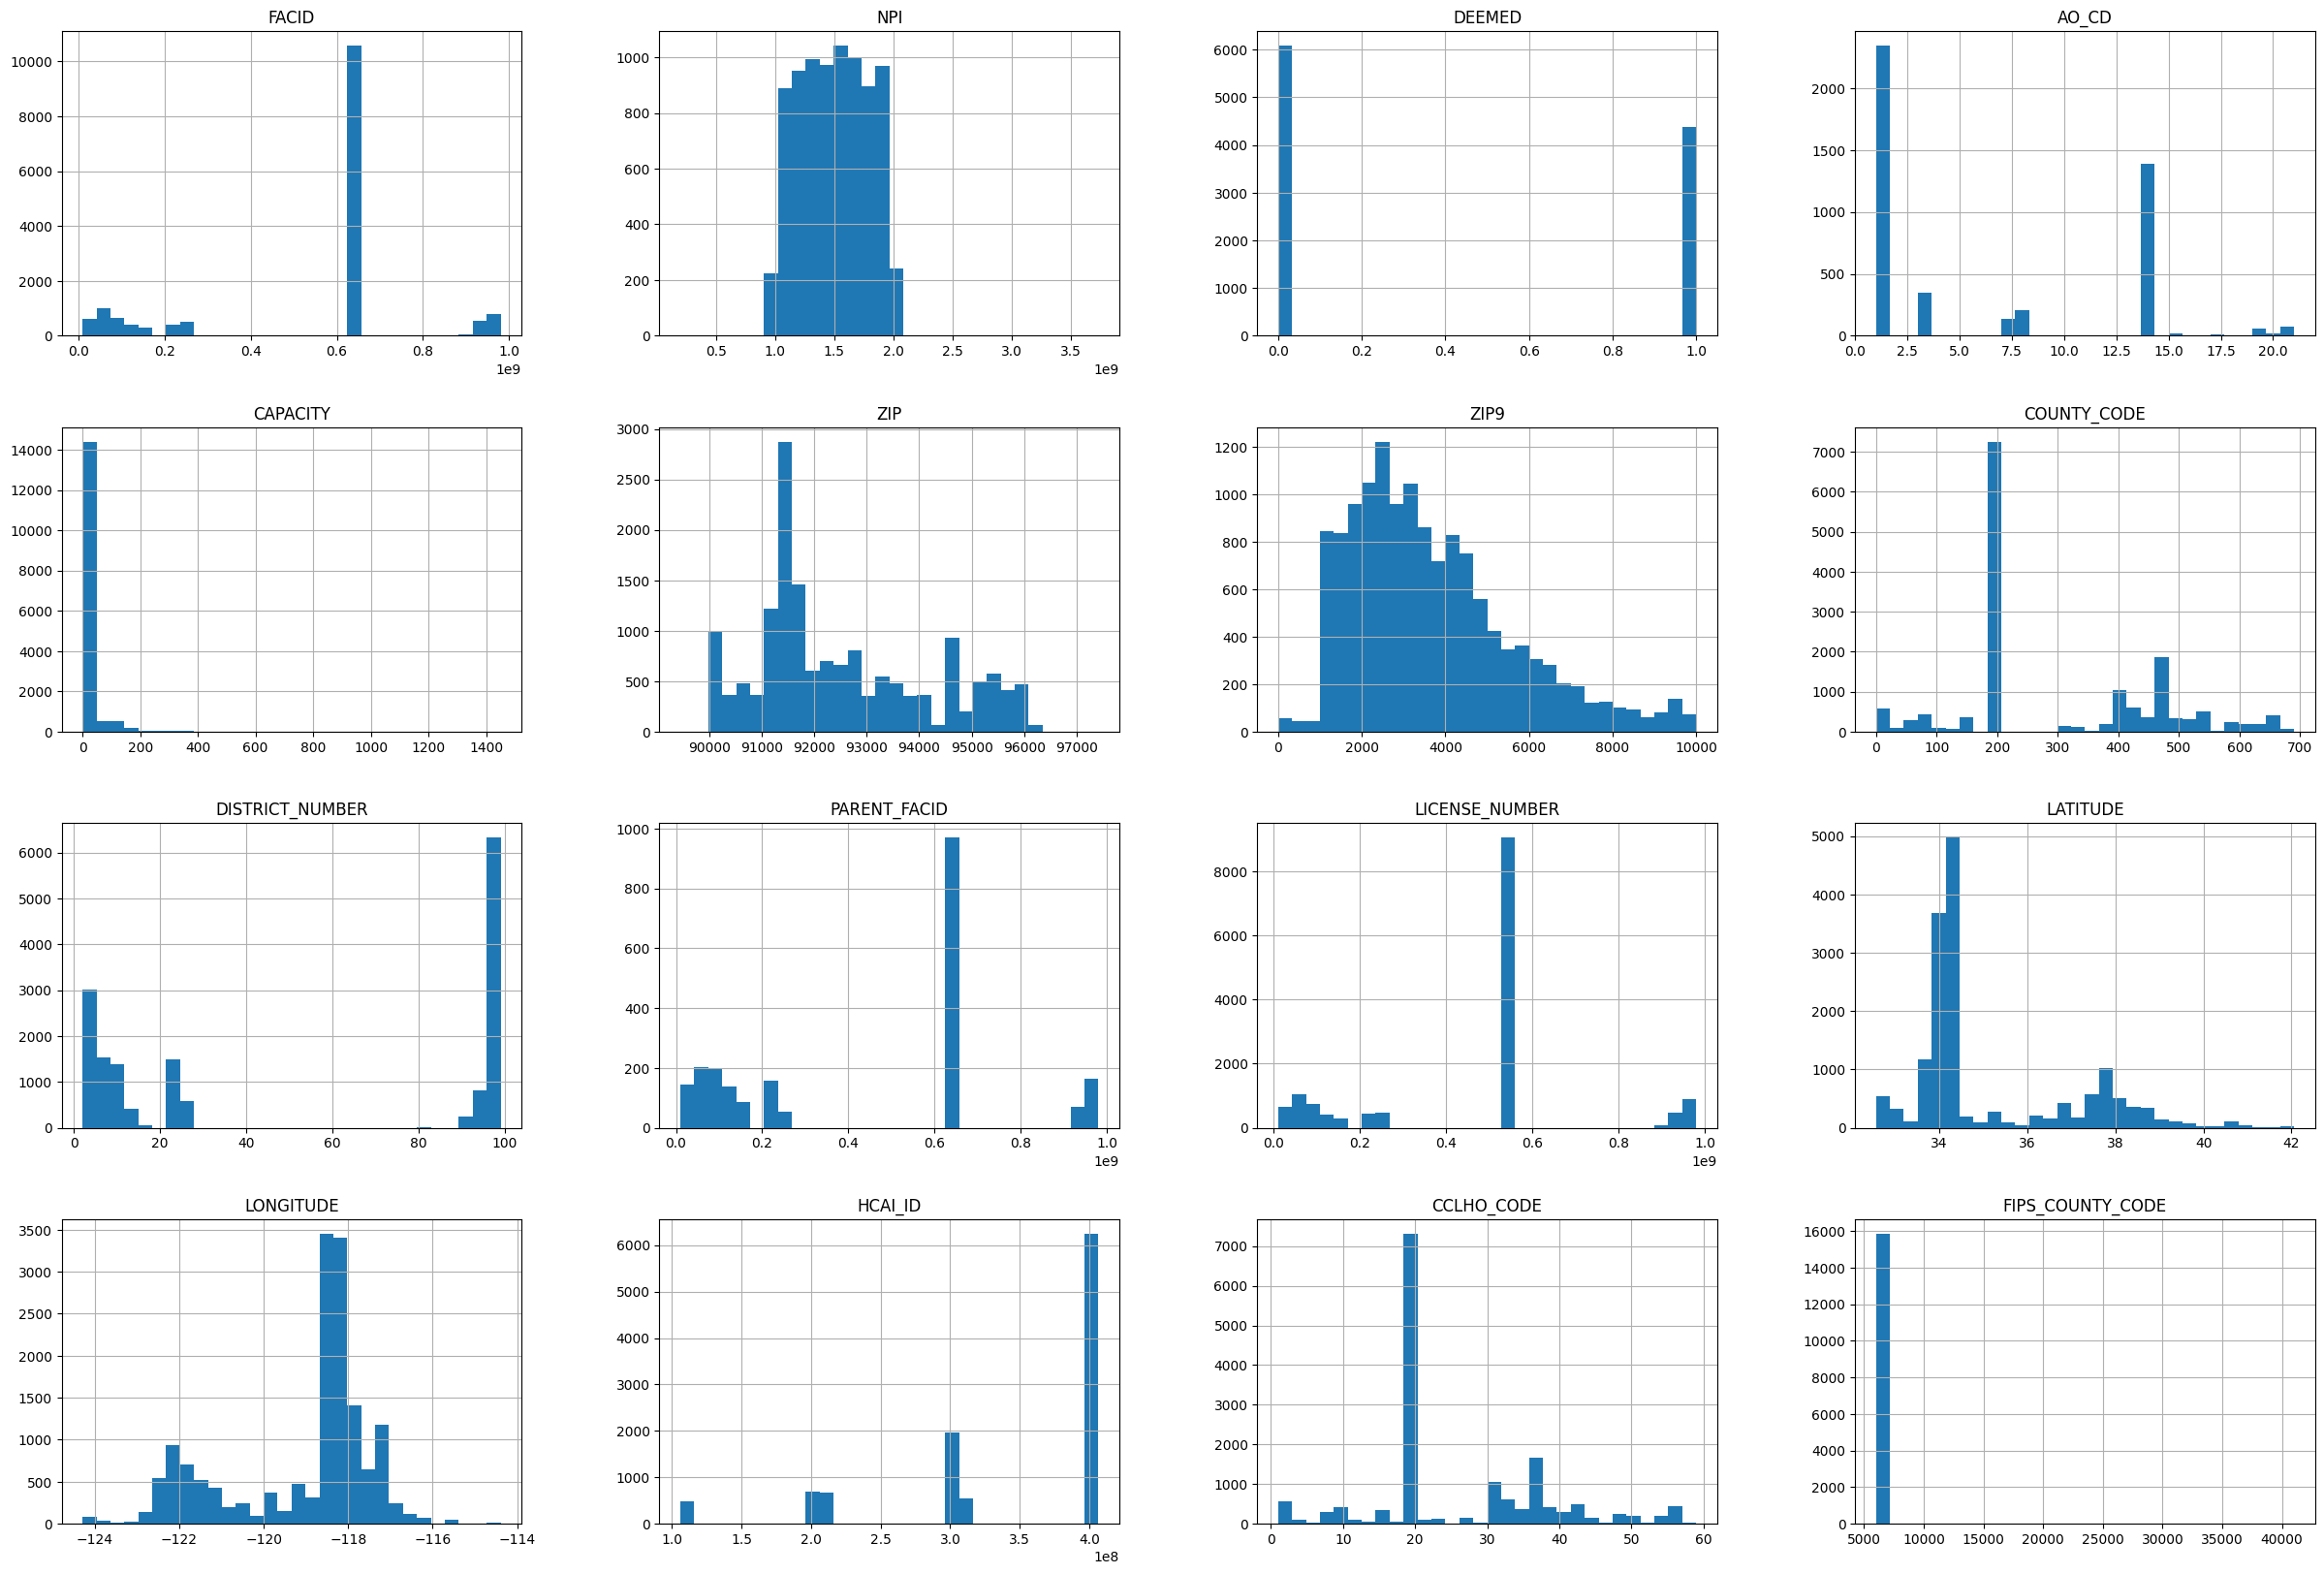

In [ ]:
health_facility.hist(bins=30, figsize=(30,20))
plt.show()

<Axes: xlabel='LATITUDE', ylabel='LONGITUDE'>

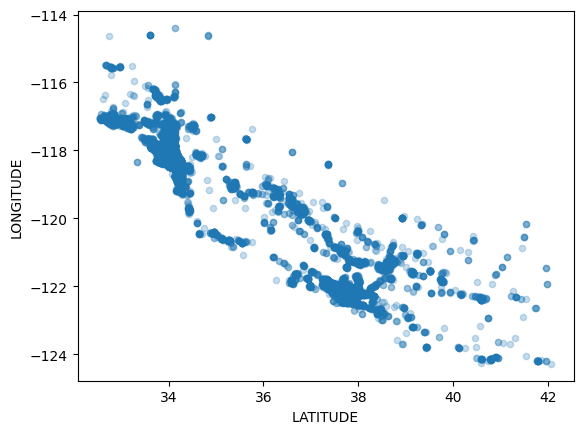

In [ ]:
health_facility.plot(kind="scatter", x="LATITUDE", y="LONGITUDE", alpha=0.25)

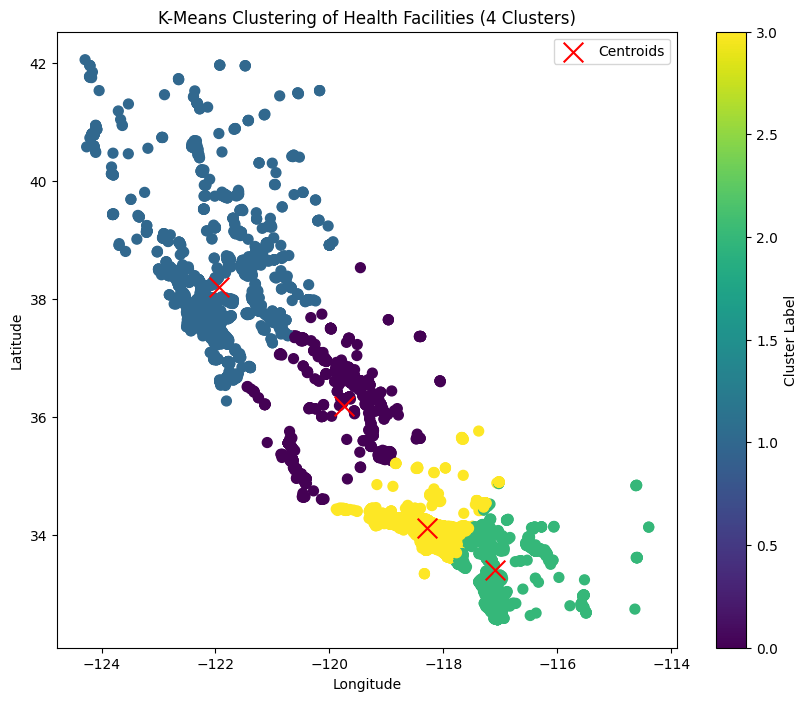


Cluster Ranges:
   Region_Cluster_KMeans    LAT_MIN    LAT_MAX     LON_MIN     LON_MAX
0                      0  34.599402  38.529036 -121.444069 -118.050741
1                      1  36.268317  42.055875 -124.288583 -119.935300
2                      2  32.558553  34.867979 -117.780714 -114.393118
3                      3  33.339267  35.758350 -119.879451 -117.016852

Classification complete. Data saved to 'healthcare_facilities_clustered_kmeans_4.xlsx'.
Pickle file created: 'healthcare_facilities_clustered_kmeans_4.pkl'


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import pickle

# Drop rows with missing LATITUDE or LONGITUDE
location_data = health_facility[['LATITUDE', 'LONGITUDE']].dropna().copy()

# Apply K-Means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
health_facility['Region_Cluster_KMeans'] = kmeans.fit_predict(location_data)

# Plot the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(location_data['LONGITUDE'], location_data['LATITUDE'],
                      c=health_facility['Region_Cluster_KMeans'], cmap='viridis', s=50)
plt.title('K-Means Clustering of Health Facilities (4 Clusters)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(scatter, label='Cluster Label')

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 1], centroids[:, 0], marker='x', s=200, color='red', label='Centroids')
plt.legend()
plt.show()

# Analyze cluster ranges
cluster_ranges = health_facility.groupby('Region_Cluster_KMeans')[['LATITUDE', 'LONGITUDE']].agg(['min', 'max'])
cluster_ranges.columns = ['LAT_MIN', 'LAT_MAX', 'LON_MIN', 'LON_MAX']
cluster_ranges = cluster_ranges.reset_index()
print("\nCluster Ranges:")
print(cluster_ranges)

# Map clusters to region names
cluster_names = {
    0: 'Southern',
    1: 'Northern',
    2: 'Bay Area',
    3: 'Central'
}
health_facility['Region_Name_KMeans'] = health_facility['Region_Cluster_KMeans'].map(cluster_names)

# Save selected columns to Excel
if 'FACNAME' in health_facility.columns and 'CITY' in health_facility.columns:
    output_df = health_facility[['FACNAME', 'CITY', 'LATITUDE', 'LONGITUDE', 'Region_Cluster_KMeans', 'Region_Name_KMeans']]
    output_df.to_excel('healthcare_facilities_clustered_kmeans_4.xlsx', index=False, engine='openpyxl')
    print("\nClassification complete. Data saved to 'healthcare_facilities_clustered_kmeans_4.xlsx'.")

    # Save the same dataframe to a pickle file
    with open('healthcare_facilities_clustered_kmeans_4.pkl', 'wb') as f:
        pickle.dump(output_df, f)
    print("Pickle file created: 'healthcare_facilities_clustered_kmeans_4.pkl'")
else:
    print("Facility name or city columns not found in the dataset.")

In [ ]:
from google.colab import files
files.download('healthcare_facilities_clustered_kmeans_4.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>